In [1]:
import pandas as pd
data=pd.read_csv("/content/Stress-Lysis.csv")
print(data)

      Humidity  Temperature  Step count  Stress Level
0        21.33        90.33         123             1
1        21.41        90.41          93             1
2        27.12        96.12         196             2
3        27.64        96.64         177             2
4        10.87        79.87          87             0
...        ...          ...         ...           ...
1996     21.82        90.82          96             1
1997     10.45        79.45          45             0
1998     27.22        96.22         135             2
1999     12.46        81.46          64             0
2000     16.87        85.87          50             1

[2001 rows x 4 columns]


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Humidity"]=le.fit_transform(data["Humidity"])
data["Temperature"]=le.fit_transform(data["Temperature"])
data["Step count"]=le.fit_transform(data["Step count"])
data["Stress Level"]=le.fit_transform(data["Stress Level"])

print(data)

      Humidity  Temperature  Step count  Stress Level
0         1133         1133         123             1
1         1141         1141          93             1
2         1712         1712         196             2
3         1764         1764         177             2
4           87           87          87             0
...        ...          ...         ...           ...
1996      1182         1182          96             1
1997        45           45          45             0
1998      1722         1722         135             2
1999       246          246          64             0
2000       687          687          50             1

[2001 rows x 4 columns]


In [3]:
data.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [4]:
x=data.drop("Stress Level",axis=1)
y=data["Stress Level"]

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

      Humidity  Temperature  Step count
1913       831          831          12
184       1382         1382         150
1508       700          700          63
1298       861          861          42
1607       580          580          34
...        ...          ...         ...
0         1133         1133         123
227        436          436          72
1513      1414         1414         182
1195       973          973         115
668       1017         1017         121

[1960 rows x 3 columns]
1913    1
184     2
1508    1
1298    1
1607    1
       ..
0       1
227     0
1513    2
1195    1
668     1
Name: Stress Level, Length: 1960, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [7]:
c=br.predict([[26.24,95.24,13]])
print("Output :",c)

Output : [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([[120., 120., 106., 100.,  55.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 80.,  80.,  94., 100., 129., 200., 107.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 100., 200., 200., 210.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <matplotlib.collections.QuadMesh at 0x7d51fd5c2c90>)

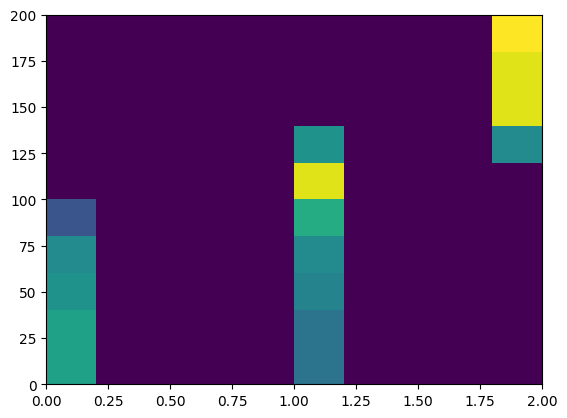

In [8]:
from matplotlib import pyplot as plt
plt.hist2d(data["Stress Level"],data["Step count"])

In [9]:
from sklearn.metrics import confusion_matrix
ypred = br.predict(xtest)
print(confusion_matrix(ytest, ypred.astype(int)))

[[17  0  0]
 [ 0  9  0]
 [ 0  0 15]]


In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

1.0


In [11]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        15

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

